In [29]:
!pip install lorem_text
from lorem_text import lorem

def generate_string(length: int) -> str:
    if length <= 0:
        return ""

    text = ""

    while len(text) < length:
        text += "\n" + lorem.paragraph()

    return text[:length-1] + "."

In [70]:
def brute_force_search(string: str, target: str, verbose: bool = False):
    string_index = 0
    match_index = 0

    target_length = len(target)
    string_length = len(string)

    matches = []

    if verbose:
        print(f"Starting search for '{target}' in a string of length {string_length}.\n")

    while string_index < string_length:
        if string[string_index + match_index] == target[match_index]:
            if verbose:
                if match_index == 0:
                    print()

                print(f"{match_index + 1}/{target_length} characters matched at index {string_index + match_index}.")

            match_index += 1

            if match_index == target_length:
                if verbose:
                    print(f"Full match found at index {string_index}.")
                    print("Moving search cursor to the end of the matched string.\n")

                matches.append({
                    "string": target,
                    "start": string_index,
                    "end": string_index + target_length - 1
                })

                string_index += match_index
                match_index = 0

                break
        else:
            if verbose:
                if match_index > 0:
                    print()
                    print(f"Character mismatch at index {string_index + match_index}.")
                    print(f"{match_index}/{target_length} characters matched before mismatch.\n")
                else:
                    print(f"Character mismatch at index {string_index}. No characters matched.")

            string_index += 1
            match_index = 0

    if verbose:
        print()
        print(f"Search Finished. Searched for '{target}' in a string of length {string_length}.")

    return matches

In [139]:
import pandas as pd
import numpy as np

import time

def benchmark(start, end, steps=10, repetitions=100):
  # target = 'quo'

  results = pd.DataFrame(columns=['Length', 'Execution Time (ns)'])

  for l in np.linspace(start, end, steps):
    length = int(l)
    string = generate_string(length)
    target = string[:10]

    for _ in range(repetitions):
      start_time = time.perf_counter_ns()
      result = brute_force_search(string, target)
      end_time = time.perf_counter_ns()

      execution_time = end_time - start_time

      results.loc[len(results)] = [length, execution_time]

  return results


In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_benchmark(results):
  # Create the line plot with a confidence interval
  plt.figure(figsize=(6, 5))
  sns.lineplot(data=results, x="Length", y="Execution Time (ns)")

  plt.grid(True)
  plt.title("Brute Force Benchmark")
  plt.xlabel("Length")
  plt.ylabel("Time (ns)")
  plt.margins(0)

  plt.tight_layout()
  plt.show()


In [140]:
results = benchmark(10, 10_000, 100, 10)

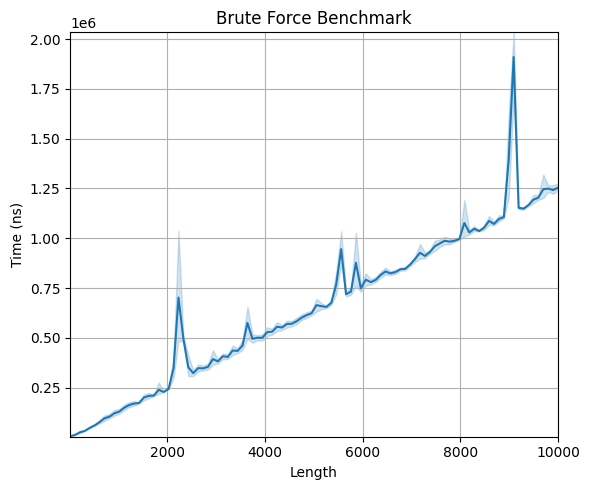

In [136]:
plot_benchmark(results)

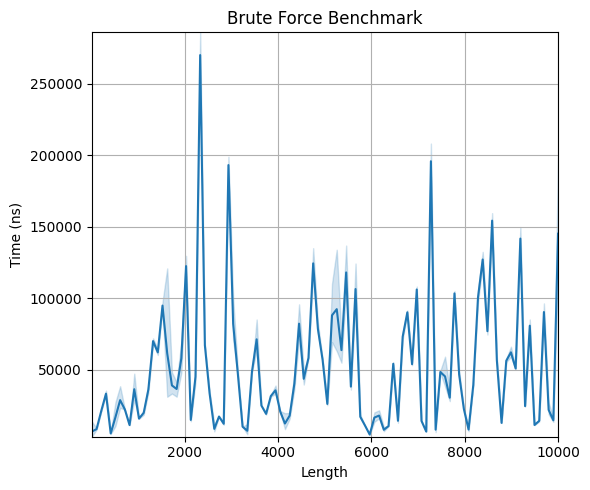

In [138]:
plot_benchmark(results)

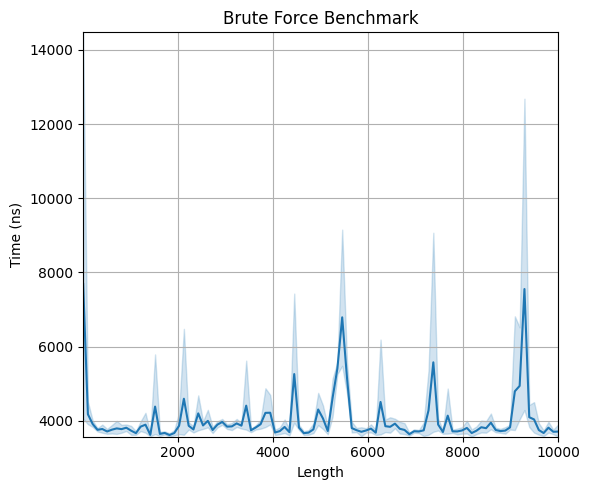

In [141]:
plot_benchmark(results)